# Spotify Data: Analysis and Clustering

The purpose of this project is to make a first approach to the Spotify Songs Dataset and to get insights regarding the distribution of musical features such as song duration, key, danceability, etc. Furthermore, Cluster Analysis is made in order to identify groups according to those same variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("fast")

## Exploratory Data Analysis

In this step I drop _song\_name_, _artist_ and _album_ columns since I won't be using them (doing so would require a lot of time spent in text analysis which scapes the purpose of the project and wouldn't add much insight).
I also transform the _artist\_genres_ column to _is\_rock_ since I think it can be a good approach to simplify the analysis while preserving some information of that column. This new variable is 1 if one of the genres of the artist is rock, 0 otherwise.

For the exploratory Data Analysis I look first at different descriptive statistics and at the distribution of the different variables, possible correlations, missing values and outliers. 

In [2]:
data = pd.read_csv('dataset_desafio.csv', index_col='song_name')
data.head()


,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_genres,artist_popularity,artist_followers,release_year
song_name,,,,,,,,,,,,,,,,,,,
Matador,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,44,['cumbia villera'],45,68434,2007
Matador - Remasterizado 2008,Los Fabulosos Cadillacs,Vasos Vacíos,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.0900,0.639,193.660,275893,60,"['argentine rock', ' latin alternative', ' lat...",67,2633939,1993
El Campanero,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,46,['cumbia villera'],45,68434,2007
Chacarera Del Sufrido,Raly Barrionuevo,El Sueño De Los Viajeros,0.682,0.629,4,-10.538,1,0.1280,0.4970,0.000028,0.4260,0.696,78.749,155933,43,"['argentine rock', ' folclore santiagueno', ' ...",51,169413,2015
Cacique Yatel,Rubén Patagonia,La Historia - 2da Parte,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,30,['folklore argentino'],25,5212,2006


In [3]:
df = data
df['is_rock'] = data['artist_genres'].str.contains('rock').astype('int')
df = data.drop(['artist', 'album', 'artist_genres'], axis=1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock
song_name,,,,,,,,,,,,,,,,,
Matador,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,44,45,68434,2007,0
Matador - Remasterizado 2008,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.0900,0.639,193.660,275893,60,67,2633939,1993,1
El Campanero,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,46,45,68434,2007,0
Chacarera Del Sufrido,0.682,0.629,4,-10.538,1,0.1280,0.4970,0.000028,0.4260,0.696,78.749,155933,43,51,169413,2015,1
Cacique Yatel,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,30,25,5212,2006,0


In [4]:
df.isnull().sum()

danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
song_popularity      0
artist_popularity    0
artist_followers     0
release_year         0
is_rock              0
dtype: int64

In [5]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,2.910000e+02,291.000000,291.000000
mean,0.577519,0.664526,5.402062,-8.009598,0.487973,0.064844,0.320144,0.074815,0.215163,0.594482,120.306581,226859.237113,44.075601,54.838488,2.741029e+06,2002.192440,0.357388
std,0.169332,0.219575,3.628412,3.394579,0.500716,0.052145,0.313434,0.217098,0.201732,0.253076,28.324863,70661.662009,25.216876,19.259517,6.953692e+06,14.362214,0.480056
min,0.103000,0.157000,0.000000,-18.752000,0.000000,0.025000,0.000004,0.000000,0.026500,0.038200,44.370000,86893.000000,0.000000,0.000000,1.300000e+01,1961.000000,0.000000
25%,0.451500,0.490500,2.000000,-10.224500,0.000000,0.035100,0.033400,0.000000,0.091050,0.399000,98.558500,180967.000000,26.000000,45.000000,4.238850e+04,1991.000000,0.000000
50%,0.587000,0.701000,6.000000,-7.178000,0.000000,0.045300,0.202000,0.000029,0.135000,0.617000,120.099000,217560.000000,50.000000,59.000000,4.685670e+05,2004.000000,0.000000
75%,0.710500,0.853500,9.000000,-5.578000,1.000000,0.067650,0.577500,0.002630,0.260000,0.822000,136.165000,266126.500000,63.000000,67.000000,1.868729e+06,2014.500000,1.000000
max,0.949000,0.986000,11.000000,-1.657000,1.000000,0.435000,0.984000,0.942000,0.970000,0.973000,193.660000,622000.000000,98.000000,91.000000,6.057431e+07,2022.000000,1.000000


In [6]:
df[['mode', 'key', 'release_year']].mode()


,mode,key,release_year
0,0,9,2012


Some quick information got from this analysis:

- There are 291 observations with no missing values 
- The loudness column has only negative values. This is because the volume is lower than the reference level with more negative values having a lower value.
- Most columns range between 0 and 1
- More than a third of artists have rock as a genre 
- The average song is not very lively nor instrumental
- Most songs in this dataset are written in minor mode, being _A_ (_La_) the most popular key.



### Distributions

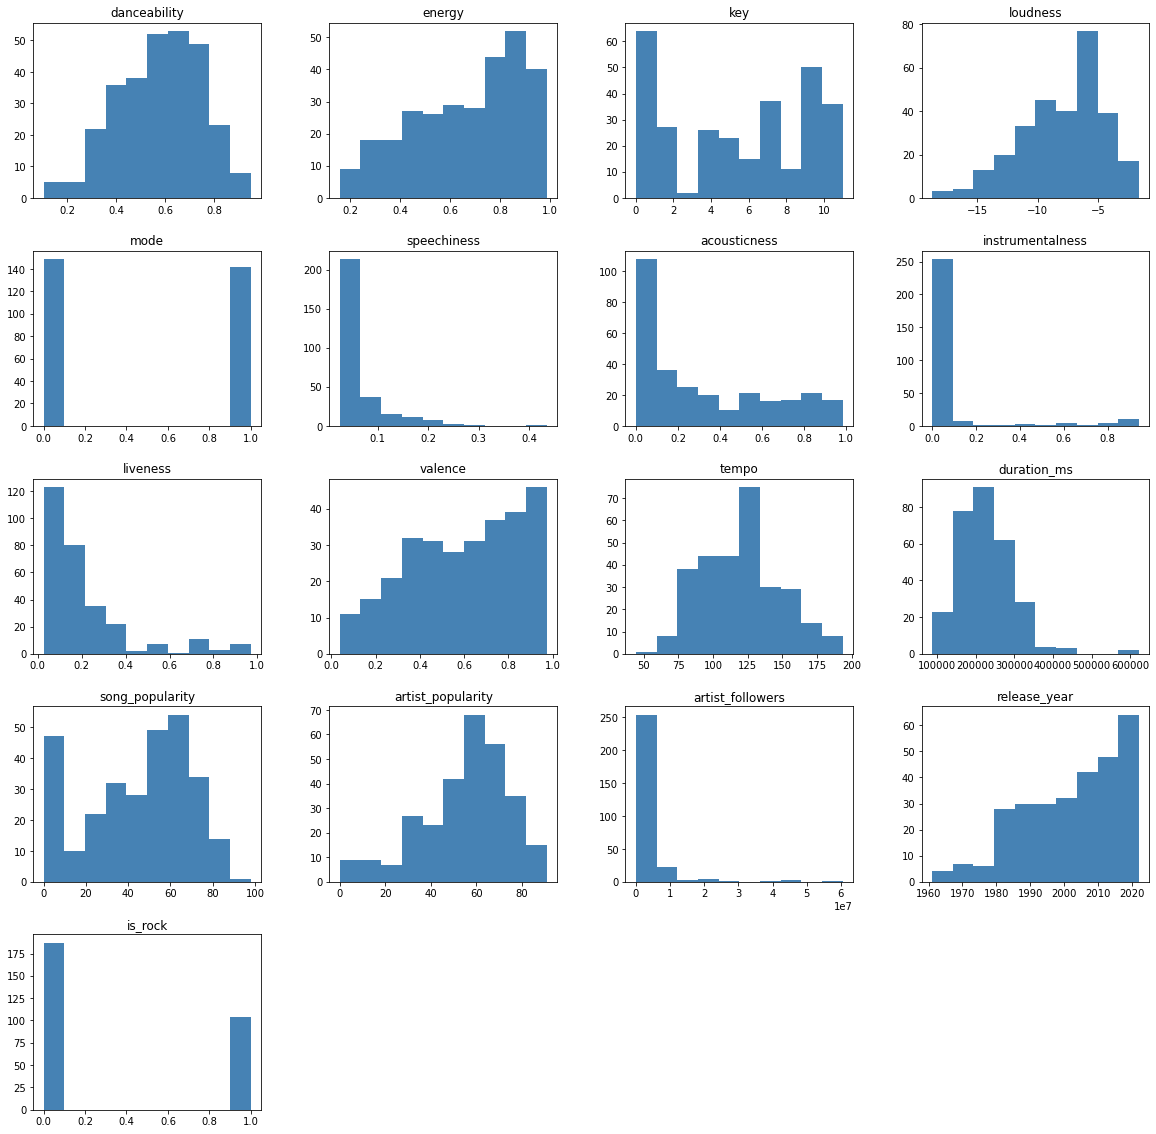

In [7]:
df.hist(figsize=(20,20), color='steelblue', grid=False);

We can see that only _danceability_ and _tempo_ variables show simmetry around the mean, while most features (_liveness_, _acousticness_, _speechiness_, _instrumentalness_ and _duration_) have a positive skew. This means that the majority of songs have a relatively low value of these variables compared to the musical possibilities and other more "unique" songs. 

It can also be noticed than almost half of the songs are written in major mode, and there are almost no songs in Db.  

### Correlation 

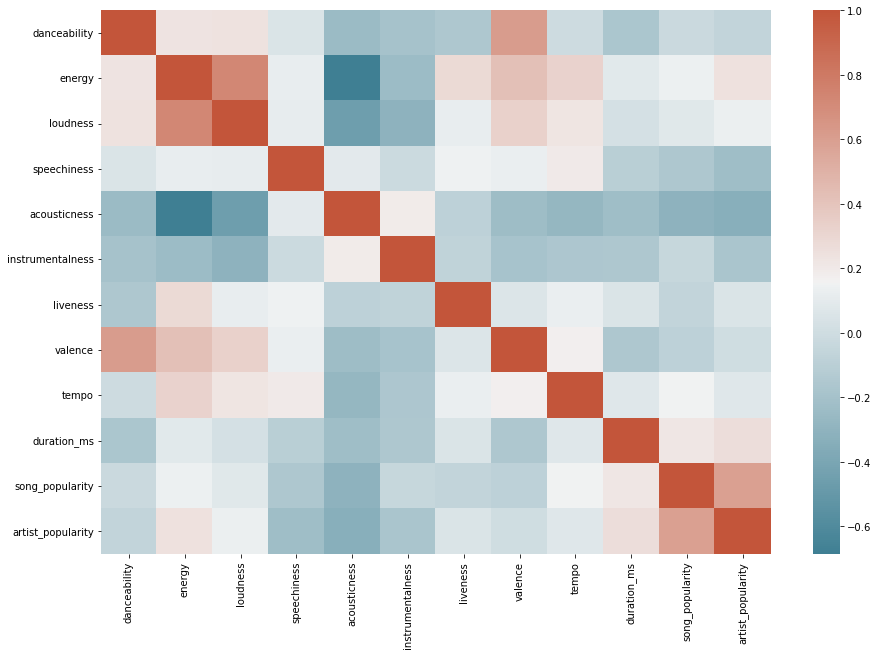

In [8]:
plt.figure(figsize=(15,10))
df_cont = df[['danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms', 'song_popularity', 'artist_popularity']]
sns.heatmap(df_cont.corr(),
           cmap=sns.diverging_palette(220, 20, as_cmap=True));


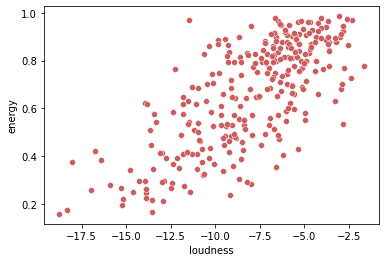

In [9]:
sns.scatterplot(x=df.loudness, y=df.energy, color='indianred');

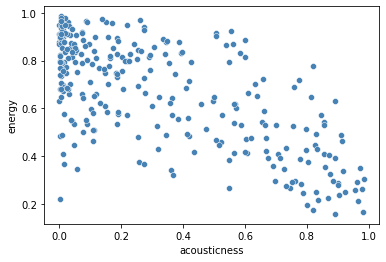

In [10]:
sns.scatterplot(x=df.acousticness, y=df.energy, color='steelblue');

Energy is positively correlated with loudness and negatively correlated with acousticness which is to be expected. Furthermore there is no single variable that can predict song popularity (appart form artist popularity which is trivial),

### Categorical Analysis

In this section I try to understand what differences do categorical variables such as _mode_ and _is\_rock_ make in the distribution of the continuous ones.

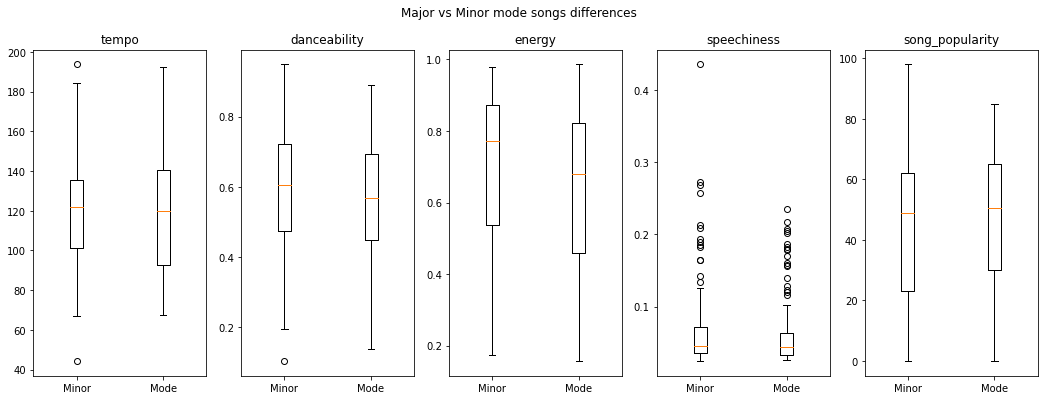

In [11]:
variables = ['tempo', 'danceability', 'energy', 'speechiness','song_popularity']

fig, axes = plt.subplots(1,5, figsize=(18,6))
fig.suptitle('Major vs Minor mode songs differences')

for i in range(5):
    axes[i].boxplot(x=[df[variables[i]].loc[df['mode']==0], df[variables[i]].loc[df['mode']==1]])
    axes[i].set_xticklabels(["Minor", "Mode"])
    axes[i].set_title(variables[i])


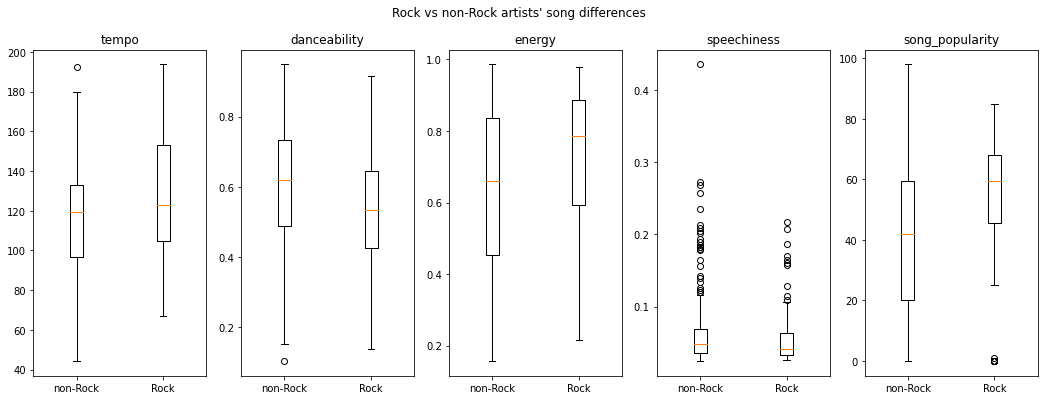

In [12]:
fig, axes = plt.subplots(1,5, figsize=(18,6))
fig.suptitle('Rock vs non-Rock artists\' song differences')

for i in range(5):
    axes[i].boxplot(x=[df[variables[i]].loc[df.is_rock==0], df[variables[i]].loc[df.is_rock==1]])
    axes[i].set_xticklabels(["non-Rock", "Rock"])
    axes[i].set_title(variables[i])


As it can be seen, Rock songs tend to have a faster tempo, lower danceability and higher energy. Furthermore, it can be noticed than Rock songs tend to have a good popularity with low variance, meaning that although they are usually quite popular the most listened songs are from a different genre.

Respecting mode, there are (surprisngly) no big differences in danceability, tempo, or song popularity. Moreover, it is notable that minor mode songs are perceived as more energetic on average that songs written in major chords.

### Time evolution

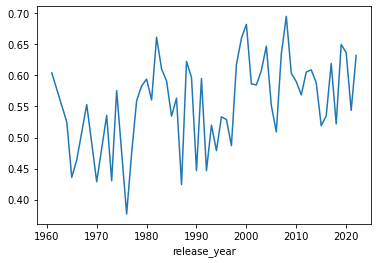

In [13]:
df_per_year = df.groupby(by="release_year").mean()
df_per_year["danceability"].plot();

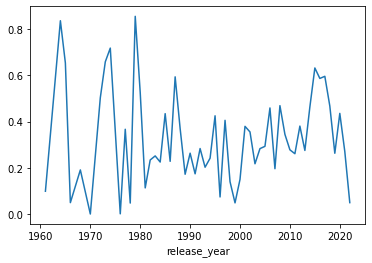

In [14]:
df_per_year["acousticness"].plot();

The evolution of the mean value for each variable is not reliable with this dataset size, since there is too much noise to signal ratio. A bigger dataset with more observations per year should be used to analyze hypothesis that appear plausible looking at the data and priors, such as "Songs got more danceable over time", 

## Clustering

### K-Means

In [15]:
from sklearn.preprocessing import Normalizer

df_norm = Normalizer().fit_transform(df)

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


silhouettes = {k: '' for k in range(2, 10)}
inertias = {k: '' for k in range(2, 10)}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_norm)
    silhouettes[k] = silhouette_score(df_norm, kmeans.labels_)
    inertias[k] = kmeans.inertia_
    del(kmeans)

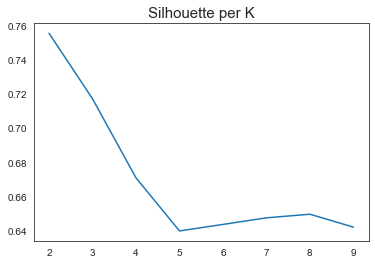

In [17]:
sns.set_style("white")
ax = sns.lineplot(x=silhouettes.keys(), y=silhouettes.values())
ax.set_title("Silhouette per K", fontsize=15)
fig.tight_layout()

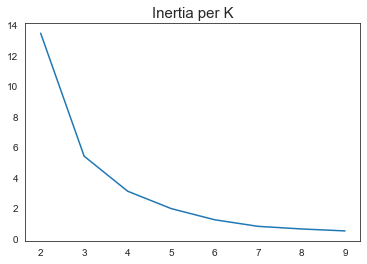

In [18]:
sns.set_style("white")
ax = sns.lineplot(x=inertias.keys(), y=inertias.values())
ax.set_title("Inertia per K", fontsize=15)
fig.tight_layout()

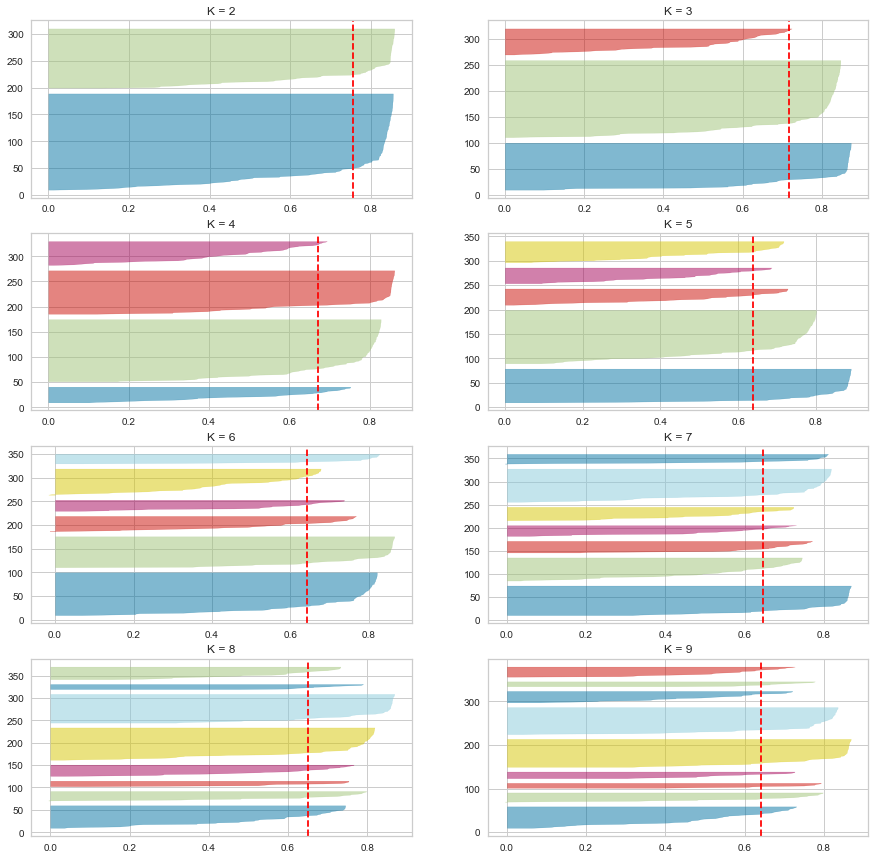

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(4, 2, figsize=(15,15))
for i in range(2,10):
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_norm)
    visualizer.set_title(f'K = {i}')

Taking different aspects into account, there is no clear optimal number of clusters but it appears to range between 2 and 5. Visual and musical inspection is needed to make sense of the results.

#### K = 3

In [20]:
kmeans_3 = KMeans(n_clusters=3, random_state=100)
kmeans_3.fit(df_norm)
df['cluster'] = kmeans_3.labels_
df['genre'] = data['artist_genres']

In [21]:
df.loc[df['cluster']==0].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Matador,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,44,45,68434,2007,0,0,['cumbia villera']
El Campanero,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,46,45,68434,2007,0,0,['cumbia villera']
Cacique Yatel,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,30,25,5212,2006,0,0,['folklore argentino']
El Choclo,0.867,0.444,10,-7.414,0,0.1890,0.8270,0.813000,0.0462,0.967,134.873,147173,18,40,38305,2003,0,0,"['orquesta tipica', ' tango', ' vintage tango']"
La Yumba - Instrumental,0.781,0.287,9,-12.447,0,0.0893,0.9010,0.881000,0.2740,0.760,121.622,166773,35,39,48255,1995,0,0,"['latin classical', ' tango', ' vintage tango']"


In [22]:
df.loc[df['cluster']==1].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Matador - Remasterizado 2008,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.0900,0.639,193.660,275893,60,67,2633939,1993,1,1,"['argentine rock', ' latin alternative', ' lat..."
Chacarera Del Rancho,0.683,0.829,9,-7.777,0,0.0629,0.1850,0.000003,0.1510,0.698,150.417,161160,50,56,514292,1998,1,1,"['argentine rock', ' folclore salteno', ' folk..."
El Humahuaqueño / Carnavalito Quebradeño,0.739,0.867,6,-2.547,0,0.1000,0.5380,0.000000,0.2830,0.927,91.074,159480,37,56,514292,2004,1,1,"['argentine rock', ' folclore salteno', ' folk..."
Balada Del Diablo y La Muerte,0.406,0.771,4,-6.991,0,0.0562,0.1280,0.000000,0.1270,0.420,132.002,336360,62,62,1334832,1996,1,1,"['argentine rock', ' latin alternative', ' lat..."
Juan de la Calle,0.487,0.744,9,-5.949,0,0.1930,0.3750,0.000000,0.0749,0.849,153.920,192027,0,58,449690,2004,0,1,"['cumbia villera', ' folclore salteno', ' folk..."


In [23]:
df.loc[df['cluster']==2].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Chacarera Del Sufrido,0.682,0.629,4,-10.538,1,0.1280,0.4970,0.000028,0.4260,0.696,78.749,155933,43,51,169413,2015,1,2,"['argentine rock', ' folclore santiagueno', ' ..."
El Tempano,0.540,0.340,9,-14.813,0,0.0641,0.3610,0.000000,0.0736,0.565,104.673,194267,50,47,112348,1983,1,2,"['argentine rock', ' cantautor', ' rock en esp..."
Convide Rutero,0.486,0.777,6,-5.604,0,0.0424,0.0156,0.000000,0.3660,0.410,78.650,247800,45,51,184109,1999,1,2,"['argentine heavy metal', ' argentine metal', ..."
Amores Como el Nuestro,0.614,0.876,9,-3.632,0,0.0299,0.3850,0.000011,0.2150,0.788,96.326,196307,0,56,353976,2011,0,2,['cumbia villera']
Wadu Wadu,0.441,0.901,5,-8.640,1,0.0442,0.1580,0.004830,0.1320,0.786,183.322,156307,52,59,257766,1981,1,2,"['argentine rock', ' latin alternative', ' lat..."


#### K = 4

In [24]:
kmeans_4 = KMeans(n_clusters=4, random_state=100)
kmeans_4.fit(df_norm)
df['cluster'] = kmeans_4.labels_

In [25]:
df.loc[df['cluster']==0].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Matador,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,44,45,68434,2007,0,0,['cumbia villera']
El Campanero,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,46,45,68434,2007,0,0,['cumbia villera']
Cacique Yatel,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,30,25,5212,2006,0,0,['folklore argentino']
El Choclo,0.867,0.444,10,-7.414,0,0.1890,0.8270,0.813000,0.0462,0.967,134.873,147173,18,40,38305,2003,0,0,"['orquesta tipica', ' tango', ' vintage tango']"
La Yumba - Instrumental,0.781,0.287,9,-12.447,0,0.0893,0.9010,0.881000,0.2740,0.760,121.622,166773,35,39,48255,1995,0,0,"['latin classical', ' tango', ' vintage tango']"


In [26]:
df.loc[df['cluster']==1].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Chacarera Del Rancho,0.683,0.829,9,-7.777,0,0.0629,0.185,0.000003,0.1510,0.698,150.417,161160,50,56,514292,1998,1,1,"['argentine rock', ' folclore salteno', ' folk..."
El Humahuaqueño / Carnavalito Quebradeño,0.739,0.867,6,-2.547,0,0.1000,0.538,0.000000,0.2830,0.927,91.074,159480,37,56,514292,2004,1,1,"['argentine rock', ' folclore salteno', ' folk..."
Amores Como el Nuestro,0.614,0.876,9,-3.632,0,0.0299,0.385,0.000011,0.2150,0.788,96.326,196307,0,56,353976,2011,0,1,['cumbia villera']
Juan de la Calle,0.487,0.744,9,-5.949,0,0.1930,0.375,0.000000,0.0749,0.849,153.920,192027,0,58,449690,2004,0,1,"['cumbia villera', ' folclore salteno', ' folk..."
Wadu Wadu,0.441,0.901,5,-8.640,1,0.0442,0.158,0.004830,0.1320,0.786,183.322,156307,52,59,257766,1981,1,1,"['argentine rock', ' latin alternative', ' lat..."


In [27]:
df.loc[df['cluster']==2].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Chacarera Del Sufrido,0.682,0.629,4,-10.538,1,0.1280,0.497000,0.000028,0.4260,0.696,78.749,155933,43,51,169413,2015,1,2,"['argentine rock', ' folclore santiagueno', ' ..."
El Tempano,0.540,0.340,9,-14.813,0,0.0641,0.361000,0.000000,0.0736,0.565,104.673,194267,50,47,112348,1983,1,2,"['argentine rock', ' cantautor', ' rock en esp..."
Campo Afuera,0.740,0.463,0,-10.879,0,0.0591,0.915000,0.000000,0.0874,0.721,144.221,147667,17,37,67236,2006,0,2,"['chamame', ' folclore tucumano', ' folklore a..."
Convide Rutero,0.486,0.777,6,-5.604,0,0.0424,0.015600,0.000000,0.3660,0.410,78.650,247800,45,51,184109,1999,1,2,"['argentine heavy metal', ' argentine metal', ..."
El Probador - Live,0.356,0.949,9,-6.329,0,0.0572,0.000164,0.170000,0.8290,0.536,155.442,222653,0,59,257766,2000,1,2,"['argentine rock', ' latin alternative', ' lat..."


In [28]:
df.loc[df['cluster']==3].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Matador - Remasterizado 2008,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.0900,0.639,193.660,275893,60,67,2633939,1993,1,3,"['argentine rock', ' latin alternative', ' lat..."
Balada Del Diablo y La Muerte,0.406,0.771,4,-6.991,0,0.0562,0.1280,0.000000,0.1270,0.420,132.002,336360,62,62,1334832,1996,1,3,"['argentine rock', ' latin alternative', ' lat..."
Vivir Mi Vida,0.656,0.877,0,-3.231,0,0.0342,0.3450,0.000000,0.3490,0.894,105.018,252347,76,77,8005189,2013,0,3,"['latin pop', ' modern salsa', ' salsa', ' tro..."
Balada - Ao Vivo,0.675,0.958,11,-4.208,0,0.0611,0.1700,0.000000,0.9650,0.813,128.006,201840,0,82,17428026,2011,0,3,"['arrocha', ' sertanejo', ' sertanejo universi..."
Bamboleo,0.611,0.886,8,-9.843,0,0.0482,0.6000,0.000001,0.0732,0.955,119.264,117699,0,66,713503,2018,0,3,"['flamenco', ' rumba', ' world']"


Looking at the clusters for different k we can see that the first cluster is very consistent and quite interpretable: it consist of non-rock traditional songs, what includes genres like 'orquesta', 'tango' and 'cumbia'. However, differences between subsequent clusters are not easy to interpret.

### DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(df_norm)

DBSCAN(eps=0.05)

In [30]:
silhouette_score(df_norm, dbscan.labels_)

0.6499521316650125

In [31]:
dbscan.labels_

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 0, 2], dtype=int64)

In [32]:
df['cluster'] = dbscan.labels_
df.loc[df['cluster']==0].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Matador,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,44,45,68434,2007,0,0,['cumbia villera']
El Campanero,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,46,45,68434,2007,0,0,['cumbia villera']
Cacique Yatel,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,30,25,5212,2006,0,0,['folklore argentino']
El Choclo,0.867,0.444,10,-7.414,0,0.1890,0.8270,0.813000,0.0462,0.967,134.873,147173,18,40,38305,2003,0,0,"['orquesta tipica', ' tango', ' vintage tango']"
La Yumba - Instrumental,0.781,0.287,9,-12.447,0,0.0893,0.9010,0.881000,0.2740,0.760,121.622,166773,35,39,48255,1995,0,0,"['latin classical', ' tango', ' vintage tango']"


In [33]:
df.loc[df['cluster']==1].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Matador - Remasterizado 2008,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.090,0.639,193.660,275893,60,67,2633939,1993,1,1,"['argentine rock', ' latin alternative', ' lat..."
Chacarera Del Sufrido,0.682,0.629,4,-10.538,1,0.1280,0.4970,0.000028,0.426,0.696,78.749,155933,43,51,169413,2015,1,1,"['argentine rock', ' folclore santiagueno', ' ..."
Chacarera Del Rancho,0.683,0.829,9,-7.777,0,0.0629,0.1850,0.000003,0.151,0.698,150.417,161160,50,56,514292,1998,1,1,"['argentine rock', ' folclore salteno', ' folk..."
El Humahuaqueño / Carnavalito Quebradeño,0.739,0.867,6,-2.547,0,0.1000,0.5380,0.000000,0.283,0.927,91.074,159480,37,56,514292,2004,1,1,"['argentine rock', ' folclore salteno', ' folk..."
Amores Como el Nuestro,0.614,0.876,9,-3.632,0,0.0299,0.3850,0.000011,0.215,0.788,96.326,196307,0,56,353976,2011,0,1,['cumbia villera']


In [34]:
df.loc[df['cluster']==2].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
El Tempano,0.540,0.340,9,-14.813,0,0.0641,0.3610,0.0,0.0736,0.565,104.673,194267,50,47,112348,1983,1,2,"['argentine rock', ' cantautor', ' rock en esp..."
Campo Afuera,0.740,0.463,0,-10.879,0,0.0591,0.9150,0.0,0.0874,0.721,144.221,147667,17,37,67236,2006,0,2,"['chamame', ' folclore tucumano', ' folklore a..."
Convide Rutero,0.486,0.777,6,-5.604,0,0.0424,0.0156,0.0,0.3660,0.410,78.650,247800,45,51,184109,1999,1,2,"['argentine heavy metal', ' argentine metal', ..."
Destino de Caminar,0.731,0.793,9,-7.373,0,0.1060,0.5480,0.0,0.0690,0.949,83.125,208840,0,50,142122,2001,1,2,"['argentine rock', ' cantautor', ' musica andi..."
Aquellos Soldaditos De Plomo,0.292,0.244,9,-13.873,1,0.0417,0.7870,0.0,0.1590,0.199,71.502,261800,0,50,142122,1995,1,2,"['argentine rock', ' cantautor', ' musica andi..."


The results for DBSCAN look very similar to the ones obtained with K-means, specially for the first cluster which maintains its distinctive nature with respect to other cluster because of its consistency. The apparent lack of regularity in the characteristics of the other clusters between algorithms and hyperparameter changes can be a sign that there are no more than two or three clear clusters in the variable space. 

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=100, perplexity=50)
tsne_res = tsne.fit_transform(df_norm)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 291 samples in 0.000s...
[t-SNE] Computed neighbors for 291 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 291 / 291
[t-SNE] Mean sigma: 0.047037
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.237286
[t-SNE] KL divergence after 800 iterations: 0.085675


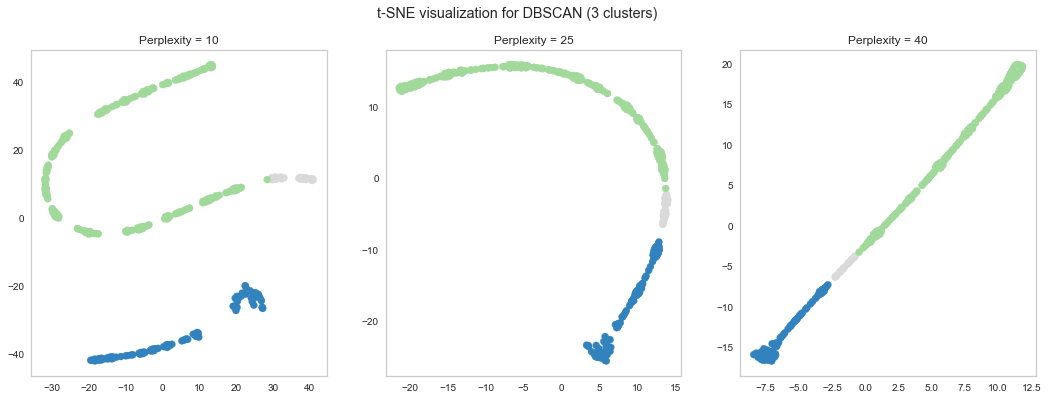

In [36]:
plt.style.use("fast")

fig, axes = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('t-SNE visualization for DBSCAN (3 clusters)')

for i, perplexity in enumerate([10, 25, 40]):
    tsne = TSNE(n_components=2, random_state=100, perplexity=perplexity)
    tsne_res = tsne.fit_transform(df_norm)
    axes[i].scatter(x=tsne_res[:,0], y=tsne_res[:,1], c=dbscan.labels_, cmap="tab20c")
    axes[i].set_title(f"Perplexity = {perplexity}")
    axes[i].grid(False)

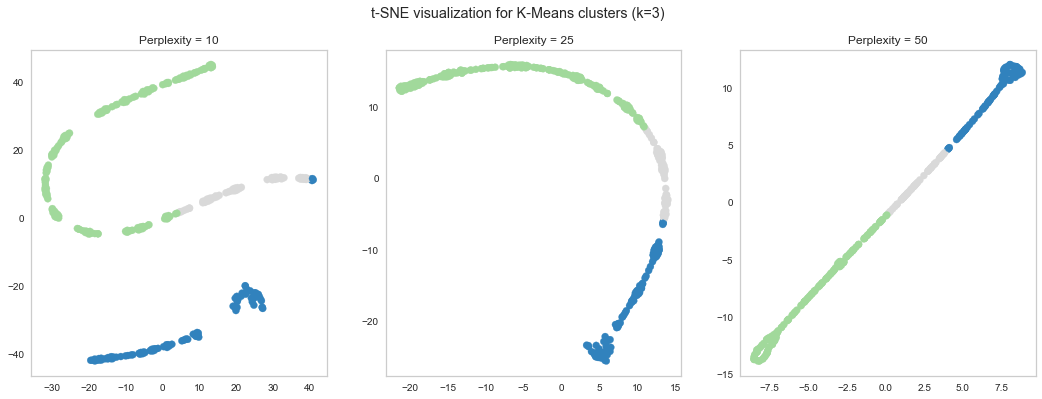

In [37]:
fig, axes = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('t-SNE visualization for K-Means clusters (k=3)')

for i, perplexity in enumerate([10, 25, 50]):
    tsne = TSNE(n_components=2, random_state=100, perplexity=perplexity)
    tsne_res = tsne.fit_transform(df_norm)
    axes[i].scatter(x=tsne_res[:,0], y=tsne_res[:,1], c=kmeans_3.labels_, cmap="tab20c")
    axes[i].set_title(f"Perplexity = {perplexity}")
    axes[i].grid(False)

This t-SNE visualizations  supports the hypothesis that the first cluster is different to the rest of the data and consistent between different algorithms. As for the rest of the data, it does not look to be grouped in any clear clusters and results differ between DBSCAN and k-Means, suggesting that the optimal number of clusters may be 2 (this is reinforced by higher associated silhouette values both for K-Means and DBSCAN) 

### Final Model and Interpretation

In [38]:
dbscan = DBSCAN(eps=0.07, min_samples=5)
dbscan.fit(df_norm)
df['cluster'] = dbscan.labels_


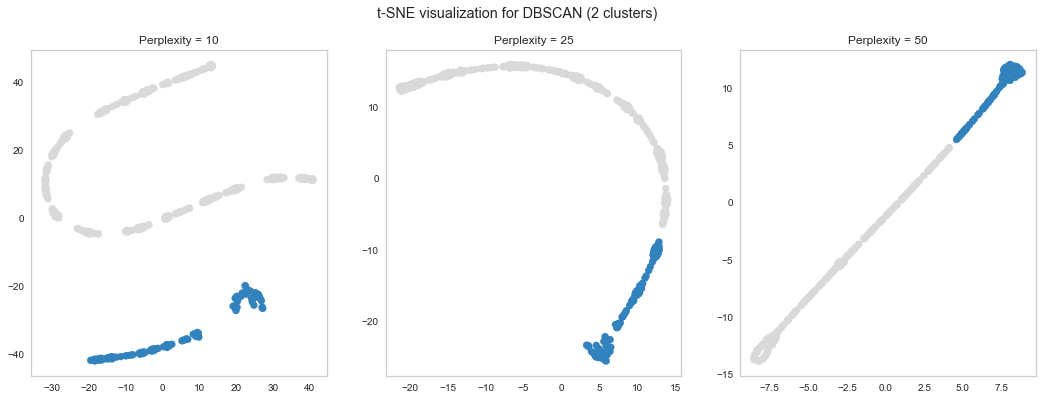

In [39]:
fig, axes = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('t-SNE visualization for DBSCAN (2 clusters)')

for i, perplexity in enumerate([10, 25, 50]):
    tsne = TSNE(n_components=2, random_state=100, perplexity=perplexity)
    tsne_res = tsne.fit_transform(df_norm)
    axes[i].scatter(x=tsne_res[:,0], y=tsne_res[:,1], c=dbscan.labels_, cmap="tab20c")
    axes[i].set_title(f"Perplexity = {perplexity}")
    axes[i].grid(False)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

x_train, x_test, y_train, y_test = train_test_split(df_norm, dbscan.labels_, test_size=0.4, random_state=100)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

f1_score(y_test, y_pred) 

1.0

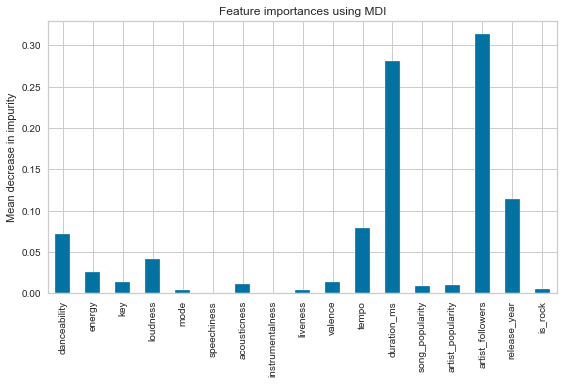

In [41]:
forest_importances = pd.Series(rf_classifier.feature_importances_, index=df.drop(['cluster', 'genre'],axis=1).columns)
fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

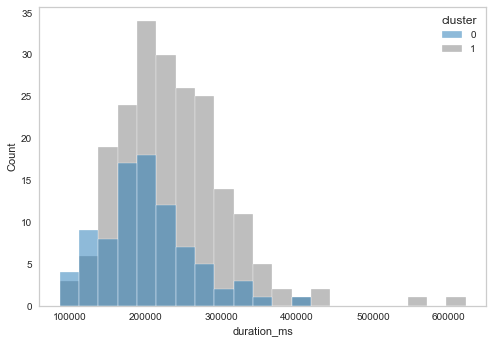

In [42]:
ax = sns.histplot(df, x='duration_ms', hue='cluster', palette=['tab:blue', 'tab:grey']);
ax.grid(False)

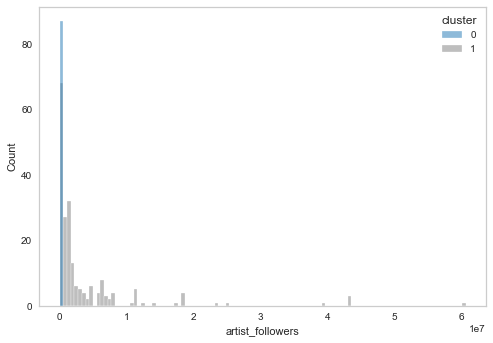

In [43]:
ax = sns.histplot(df, x='artist_followers', hue='cluster', palette=['tab:blue', 'tab:grey']);
ax.grid(False)

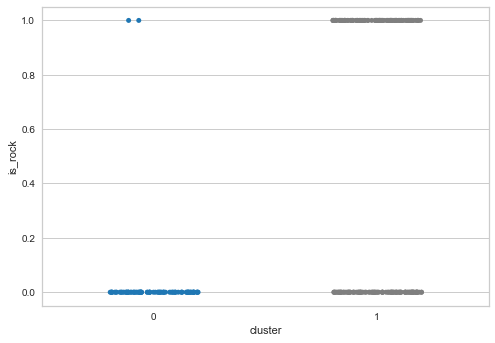

In [44]:
sns.stripplot(x=df.cluster, y=df.is_rock, jitter=0.2, palette=['tab:blue', 'tab:grey']);

In [45]:
df.loc[df['cluster']==0].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Matador,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,44,45,68434,2007,0,0,['cumbia villera']
El Campanero,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,46,45,68434,2007,0,0,['cumbia villera']
Cacique Yatel,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,30,25,5212,2006,0,0,['folklore argentino']
El Choclo,0.867,0.444,10,-7.414,0,0.1890,0.8270,0.813000,0.0462,0.967,134.873,147173,18,40,38305,2003,0,0,"['orquesta tipica', ' tango', ' vintage tango']"
La Yumba - Instrumental,0.781,0.287,9,-12.447,0,0.0893,0.9010,0.881000,0.2740,0.760,121.622,166773,35,39,48255,1995,0,0,"['latin classical', ' tango', ' vintage tango']"


In [46]:
df.loc[df['cluster']==1].head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_popularity,artist_followers,release_year,is_rock,cluster,genre
song_name,,,,,,,,,,,,,,,,,,,
Matador - Remasterizado 2008,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.0900,0.639,193.660,275893,60,67,2633939,1993,1,1,"['argentine rock', ' latin alternative', ' lat..."
Chacarera Del Sufrido,0.682,0.629,4,-10.538,1,0.1280,0.4970,0.000028,0.4260,0.696,78.749,155933,43,51,169413,2015,1,1,"['argentine rock', ' folclore santiagueno', ' ..."
Chacarera Del Rancho,0.683,0.829,9,-7.777,0,0.0629,0.1850,0.000003,0.1510,0.698,150.417,161160,50,56,514292,1998,1,1,"['argentine rock', ' folclore salteno', ' folk..."
El Humahuaqueño / Carnavalito Quebradeño,0.739,0.867,6,-2.547,0,0.1000,0.5380,0.000000,0.2830,0.927,91.074,159480,37,56,514292,2004,1,1,"['argentine rock', ' folclore salteno', ' folk..."
El Tempano,0.540,0.340,9,-14.813,0,0.0641,0.3610,0.000000,0.0736,0.565,104.673,194267,50,47,112348,1983,1,1,"['argentine rock', ' cantautor', ' rock en esp..."


## Conclusion

This data science project aimed to analyze the Spotify Songs Dataset, focusing on the distribution of musical features and utilizing cluster analysis to identify groups based on those variables.

Through Exploratory Data Analysis, I observed that song duration varis widely, keys are balanced, and most songs have low values for most features (positive skew). Furthermore, there is no single variable that can predict song popularity. Surprisingly, there are no significant differences in danceability, tempo, or popularity based on musical modes.

Using K-Means and DBSCAN algorithms, I attempted Clustering Analysis, by comparing the results within the different hypothesis spaces and looking for consistencies. This evaluation was made not only with clustering fitness metrics such as Silhouette and internal distance, but also through visualizations, using t-SNE dimensionality reduction techinque, and, most importantly, manual inspection through the individual instances of each cluster and their musical characteristics. 

The end result consists in two clusters, where the first  comprises non-rock traditional songs, usually shorter in duration, and authored by lesser followed artists in Spotify (either because they target audience is older or because they have only a couple of famous songs). Some clear examples of this are "El Choclo", "la Yumba" or "El Coya Dance".
On the other hand, the second cluster is far more heterogeneous but contains songs from national and international artists as famous as the "Fabulosos Cadillacs", David Guetta and the Red Hot Chili Peppers; rock songs such as Califronication or Paranoid and longer pieces like Layla and Sinnerman.

This project provided insights into the distribution of musical features in the Spotify Songs Dataset and explored cluster analysis. While some insightfull and interesting patterns emerged, the analysis suffered from de dataset size and overall musical heterogeneity: while songs can be vaguely classified in genres and measured with metrics such as "loudness" and "acousticness", they are all unique and tend to cover almost all the spectrum of possible combinations of these features. Further analysis could be made by adding features that convey information about people preferences and listening behaviours and extending the dataset size to include more songs. 